# Naive Bayes

## Libraries Loading

In [1]:
library(tidyverse)
library(ggplot2)
library(e1071)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data loading

In [2]:
data <- read_csv('../00_data/Social_Network_Ads.csv')
head(data)

Rows: 400 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Age, EstimatedSalary, Purchased

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,EstimatedSalary,Purchased
<dbl>,<dbl>,<dbl>
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [3]:
# data structure
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …


In [4]:
data <- data |>
        mutate(Purchased = factor(data$Purchased, levels = c(0, 1), labels = c('No', 'Yes')))

In [5]:
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <fct> No, No, No, No, No, No, No, Yes, No, No, No, No, No, N…


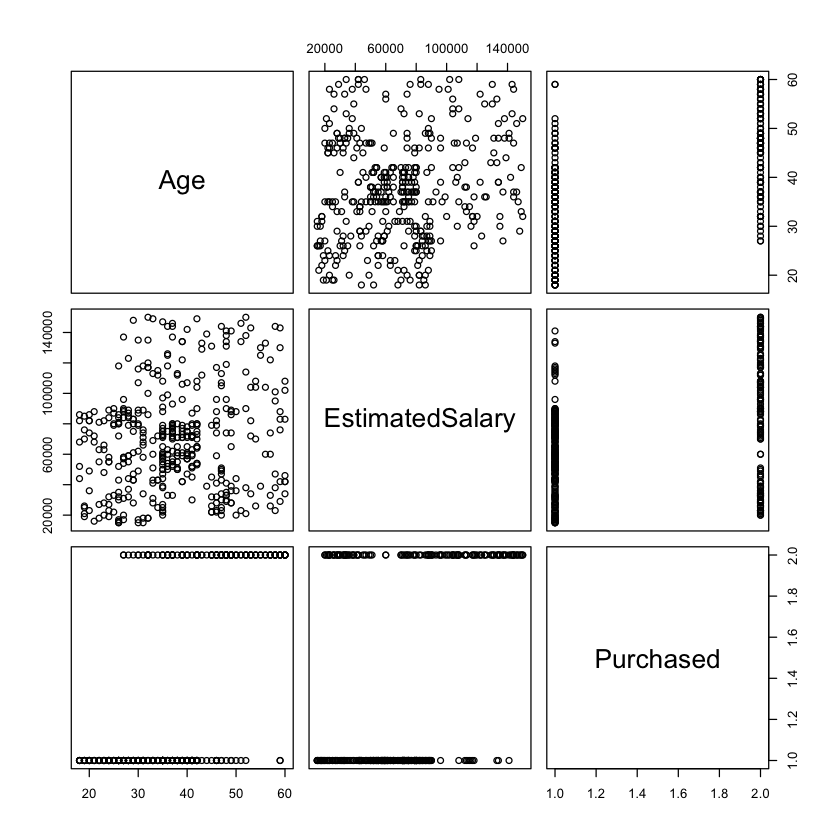

In [6]:
pairs(data)

# Splitting data into training and test set

In [7]:
set.seed(123)

train_data <- data |> slice_sample(prop = 0.75)
test_data <- data |> anti_join(train_data)

Joining with `by = join_by(Age, EstimatedSalary, Purchased)`


## Feature scaling

In [8]:
train_data[-3] <- scale(train_data[, -3])
test_data[-3] <- scale(test_data[, -3])

## Fit the model

In [9]:
fit <- naiveBayes(Purchased ~ .,
               data = train_data)

## Predicting the test set

In [10]:
y_pred <- predict(fit, newdata= test_data, type='class')
head(y_pred)

[1] No  No  Yes No  Yes No 
Levels: No Yes

In [11]:
head(predict(fit, newdata= test_data, type='raw'))

No,Yes
0.99287200,0.007128005
0.98028590,0.019714104
0.02276331,0.977236688
0.98937185,0.010628153
0.45028224,0.549717763
0.54775865,0.452241354


## Model Performance

### Confusion Matrix

In [12]:
cm <- table(test_data$Purchased, y_pred)
print(cm)

     y_pred
      No Yes
  No  48   5
  Yes  7  24


### Accuracy Score

In [13]:
accuracy <- mean(test_data$Purchased == y_pred)
print(paste0('Accuracy on test set: ', round(accuracy*100, 2), "%"))

[1] "Accuracy on test set: 85.71%"


## Viz the Data

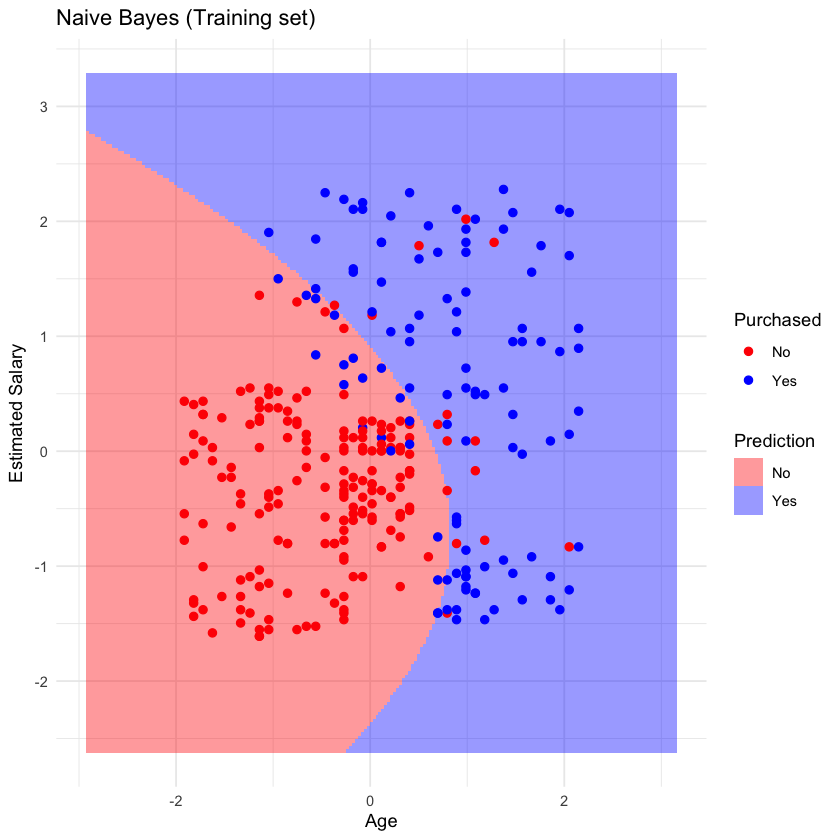

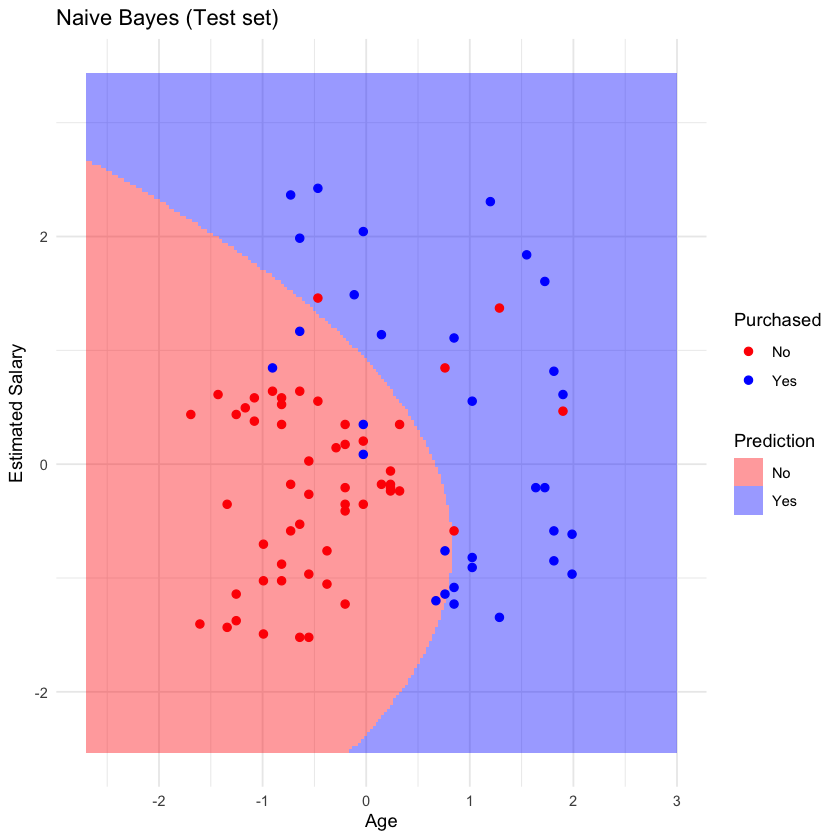

In [14]:
nb_pred_boundary <- function(model, df_test, name){
        X1 <- seq(min(df_test$Age) - 1, max(df_test$Age) + 1, length.out = 200)
        X2 <- seq(min(df_test$EstimatedSalary) - 1, max(df_test$EstimatedSalary) + 1, length.out = 200)
        grid <- expand.grid(X1, X2)
        colnames(grid) <- c('Age', 'EstimatedSalary')
        grid$Prediction <- predict(model, newdata = grid)
        
        print(ggplot() +
            geom_tile(data=grid, aes(x = Age, y = EstimatedSalary, fill = as.factor(Prediction)), alpha=0.4) +
            geom_point(df_test, mapping=aes(x = Age, y = EstimatedSalary, colour = Purchased), size=2) +
            scale_fill_manual(values = c("red", "blue"), name = "Prediction") +
            scale_color_manual(values = c("red", "blue"), name = "Purchased") +
            labs(title = paste0("Naive Bayes (", name,")"), x = "Age", y = "Estimated Salary") +
            theme_minimal())
    }
    
nb_pred_boundary(fit, train_data, 'Training set')
nb_pred_boundary(fit, test_data, 'Test set')